# 🌍 Economic & Human Capital Data Visualization Notebook

This notebook loads the cleaned dataset and provides **exploratory data analysis (EDA)** and **GDP-based visualizations**.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('../../data/cleaned/resources_human_capital_cleaned.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (232, 86)

Columns: ['Country', 'Population_millions_2024', 'Surface area_sq. km thousands_2024', 'Population density_people per sq. km_2024', 'Rural_Env_Rural population_2022', 'Rural_Env_Rural population growth (annual %)_2022', 'Rural_Env_Land area (sq. km)_2021', 'Rural_Env_Forest area (% of land area)_2021', 'Rural_Env_Permanent cropland (% of land area)_2021', 'Rural_Env_Arable land (% of land area)_2021', 'Rural_Env_Arable land (hectares per person)_2021', 'Agri_Inputs_Agricultural land_% of land area_2021', 'Agri_Inputs_Agricultural land_% irrigated_2021', 'Agri_Inputs_Average annual precipitation_millimeters_2020', 'Agri_Inputs_Land under cereal production_hectares thousands_2021', 'Agri_Inputs_Fertilizer consumption_% of fertilizer production_2021', 'Agri_Inputs_Fertilizer consumption_kilograms per hectare of arable land_2021', 'Agri_Inputs_Agricultural employment_% of total employment_2020', 'Forest_Bio_Forest area_sq. km thousands_1990', 'Forest_Bio_Forest ar

,Country,Population_millions_2024,Surface area_sq. km thousands_2024,Population density_people per sq. km_2024,Rural_Env_Rural population_2022,Rural_Env_Rural population growth (annual %)_2022,Rural_Env_Land area (sq. km)_2021,Rural_Env_Forest area (% of land area)_2021,Rural_Env_Permanent cropland (% of land area)_2021,Rural_Env_Arable land (% of land area)_2021,...,Edu_Completion_Primary completion rate_Male_% of relevant age group_2022,Edu_Completion_Primary completion rate_Female_% of relevant age group_2022,Edu_Completion_Lower secondary completion rate_Male_% of relevant age group_2022,Edu_Completion_Lower secondary completion rate_Female_% of relevant age group_2022,Edu_Completion_Youth literacy rate_Male_% of ages 15-24_2016-23,Edu_Completion_Youth literacy rate_Female_% of ages 15-24_2016-23,Edu_Completion_Adult literacy rate_Male_% ages 15 and older_2016-23,Edu_Completion_Adult literacy rate_Female_% ages 15 and older_2016-23,Edu_Completion_Students at lowest proficiency on PISA_Mathematics_% of 15 year-olds_2018,Edu_Completion_Students at lowest proficiency on PISA_Science_% of 15 year-olds_2018
0,Afghanistan,42.647492,652.87,63.558501,29778.38,1.03,652230.0,1.85,0.34,12.00,...,107.0,70.0,75.0,45.0,83.0,44.0,52.0,27.0,14.0,1.0
1,Albania,2.700000,28.75,100.217956,1005.55,-3.48,27400.0,28.79,3.20,21.89,...,105.0,98.0,99.0,95.0,99.0,99.0,98.0,97.0,17.0,2.0
2,Algeria,46.814308,2381.74,19.382560,11473.04,-0.42,2381741.0,0.82,0.39,3.16,...,93.0,95.0,60.0,90.0,97.0,98.0,93.0,74.0,51.0,4.0
3,American Samoa,0.046770,0.20,237.605000,6.19,-2.02,200.0,85.50,9.65,4.85,...,95.0,96.0,90.0,92.0,97.0,98.0,93.0,92.0,14.0,1.0
4,Andorra,0.081940,0.47,172.034043,9.72,2.08,470.0,34.04,0.02,1.59,...,71.0,68.0,100.0,101.0,97.0,98.0,93.0,92.0,14.0,1.0


In [8]:
# Check data types and missing values
print("Dataset Information:")
print(df.info())

print("\nMissing Values Summary:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
display(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# Summary statistics for key numerical columns
print("\nSummary Statistics for Key Columns:")
key_columns = [
    'Population_millions_2024',
    'Population density_people per sq. km_2024',
    'Agri_Inputs_Agricultural land_% of land area_2021',
    'Energy_Energy use_per capita_kilograms of oil equivalent_2015',
    'Population_Population age composition_Ages 15-64_%_2024',
    'Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant age group_2022'
]
display(df[key_columns].describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 86 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Country                                                                                   232 non-null    object 
 1   Population_millions_2024                                                                  232 non-null    float64
 2   Surface area_sq. km thousands_2024                                                        232 non-null    float64
 3   Population density_people per sq. km_2024                                                 232 non-null    float64
 4   Rural_Env_Rural population_2022                                                           232 non-null    float64
 5   Rural_Env_Rural population growth (a

,Missing Values,Percentage



Summary Statistics for Key Columns:


,Population_millions_2024,Population density_people per sq. km_2024,Agri_Inputs_Agricultural land_% of land area_2021,Energy_Energy use_per capita_kilograms of oil equivalent_2015,Population_Population age composition_Ages 15-64_%_2024,Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant age group_2022
count,232.000000,232.000000,232.000000,232.00000,232.000000,232.000000
mean,139.755023,410.626221,37.543103,2092.87500,64.021552,49.959914
std,654.148528,1948.693673,21.516285,2479.79837,5.658726,25.954527
min,0.000000,0.138543,0.000000,76.00000,49.000000,2.700000
25%,1.333589,39.862196,20.000000,899.00000,60.750000,34.075000
50%,7.769819,93.092535,39.000000,1449.00000,65.000000,50.300000
75%,34.478502,226.510204,52.000000,2083.50000,67.000000,60.025000
max,8142.056450,20569.696970,85.000000,16911.00000,83.000000,166.700000


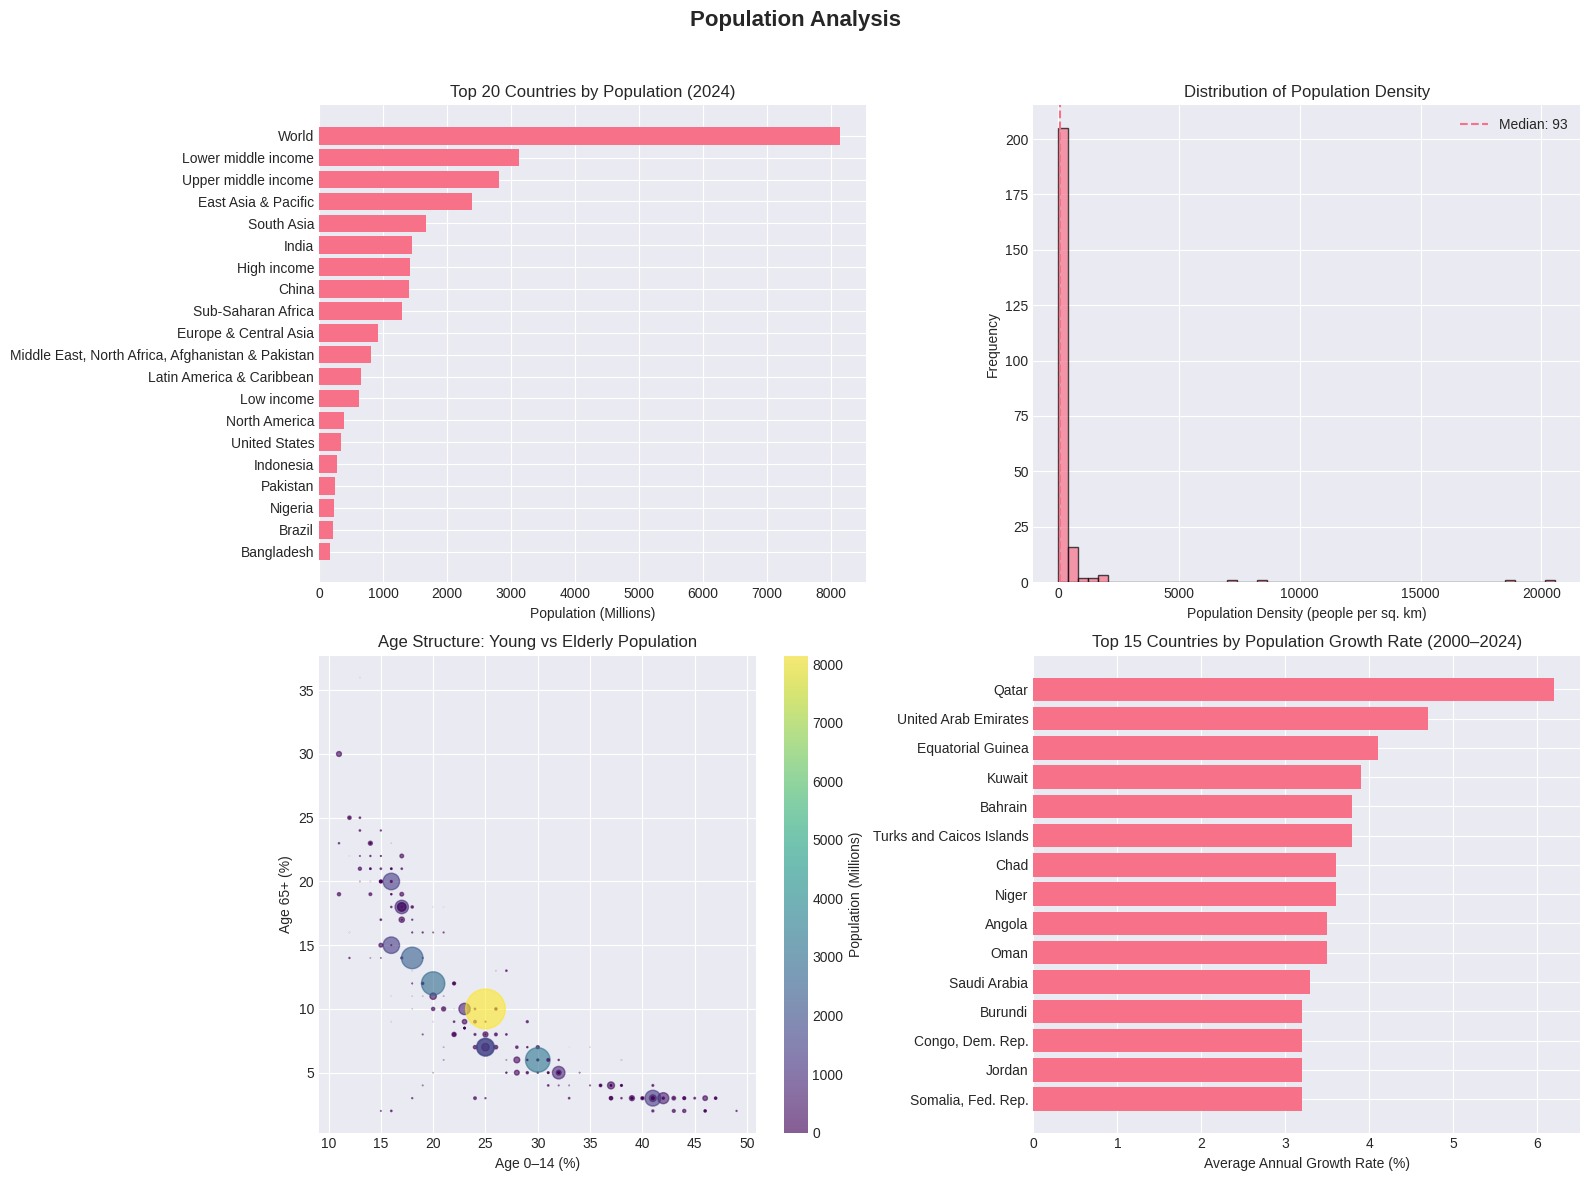

In [16]:
# Create figure for population analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Population Analysis', fontsize=16, fontweight='bold')

# ===============================
# 3.1: Top 20 countries by population
# ===============================
top_20_pop = df.nlargest(20, 'Population_millions_2024')

axes[0, 0].barh(
    top_20_pop['Country'],
    top_20_pop['Population_millions_2024']
)
axes[0, 0].set_xlabel('Population (Millions)')
axes[0, 0].set_title('Top 20 Countries by Population (2024)')
axes[0, 0].invert_yaxis()

# ===============================
# 3.2: Population density distribution
# ===============================
density_col = 'Population density_people per sq. km_2024'

axes[0, 1].hist(
    df[density_col].dropna(),
    bins=50,
    edgecolor='black',
    alpha=0.7
)

median_density = df[density_col].median()
axes[0, 1].axvline(
    median_density,
    linestyle='--',
    label=f'Median: {median_density:.0f}'
)

axes[0, 1].set_xlabel('Population Density (people per sq. km)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Population Density')
axes[0, 1].legend()

# ===============================
# 3.3: Age composition correlation
# ===============================
scatter = axes[1, 0].scatter(
    df['Population_Population age composition_Ages 0-14_%_2024'],
    df['Population_Population age composition_Ages 65+_%_2024'],
    c=df['Population_millions_2024'],
    s=df['Population_millions_2024'] / 10,
    alpha=0.6,
    cmap='viridis'
)

axes[1, 0].set_xlabel('Age 0–14 (%)')
axes[1, 0].set_ylabel('Age 65+ (%)')
axes[1, 0].set_title('Age Structure: Young vs Elderly Population')

plt.colorbar(scatter, ax=axes[1, 0], label='Population (Millions)')

# ===============================
# 3.4: Population growth trends
# ===============================
growth_col = 'Population_Average annual population growth %_2000-2024'
growth_df = df.nlargest(15, growth_col)

axes[1, 1].barh(
    growth_df['Country'],
    growth_df[growth_col]
)
axes[1, 1].set_xlabel('Average Annual Growth Rate (%)')
axes[1, 1].set_title('Top 15 Countries by Population Growth Rate (2000–2024)')
axes[1, 1].invert_yaxis()

# ===============================
# Final layout and save
# ===============================
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('../../outputs/eda/economic_visualization/population_analysis_visualizations.png', dpi=300)
plt.show()


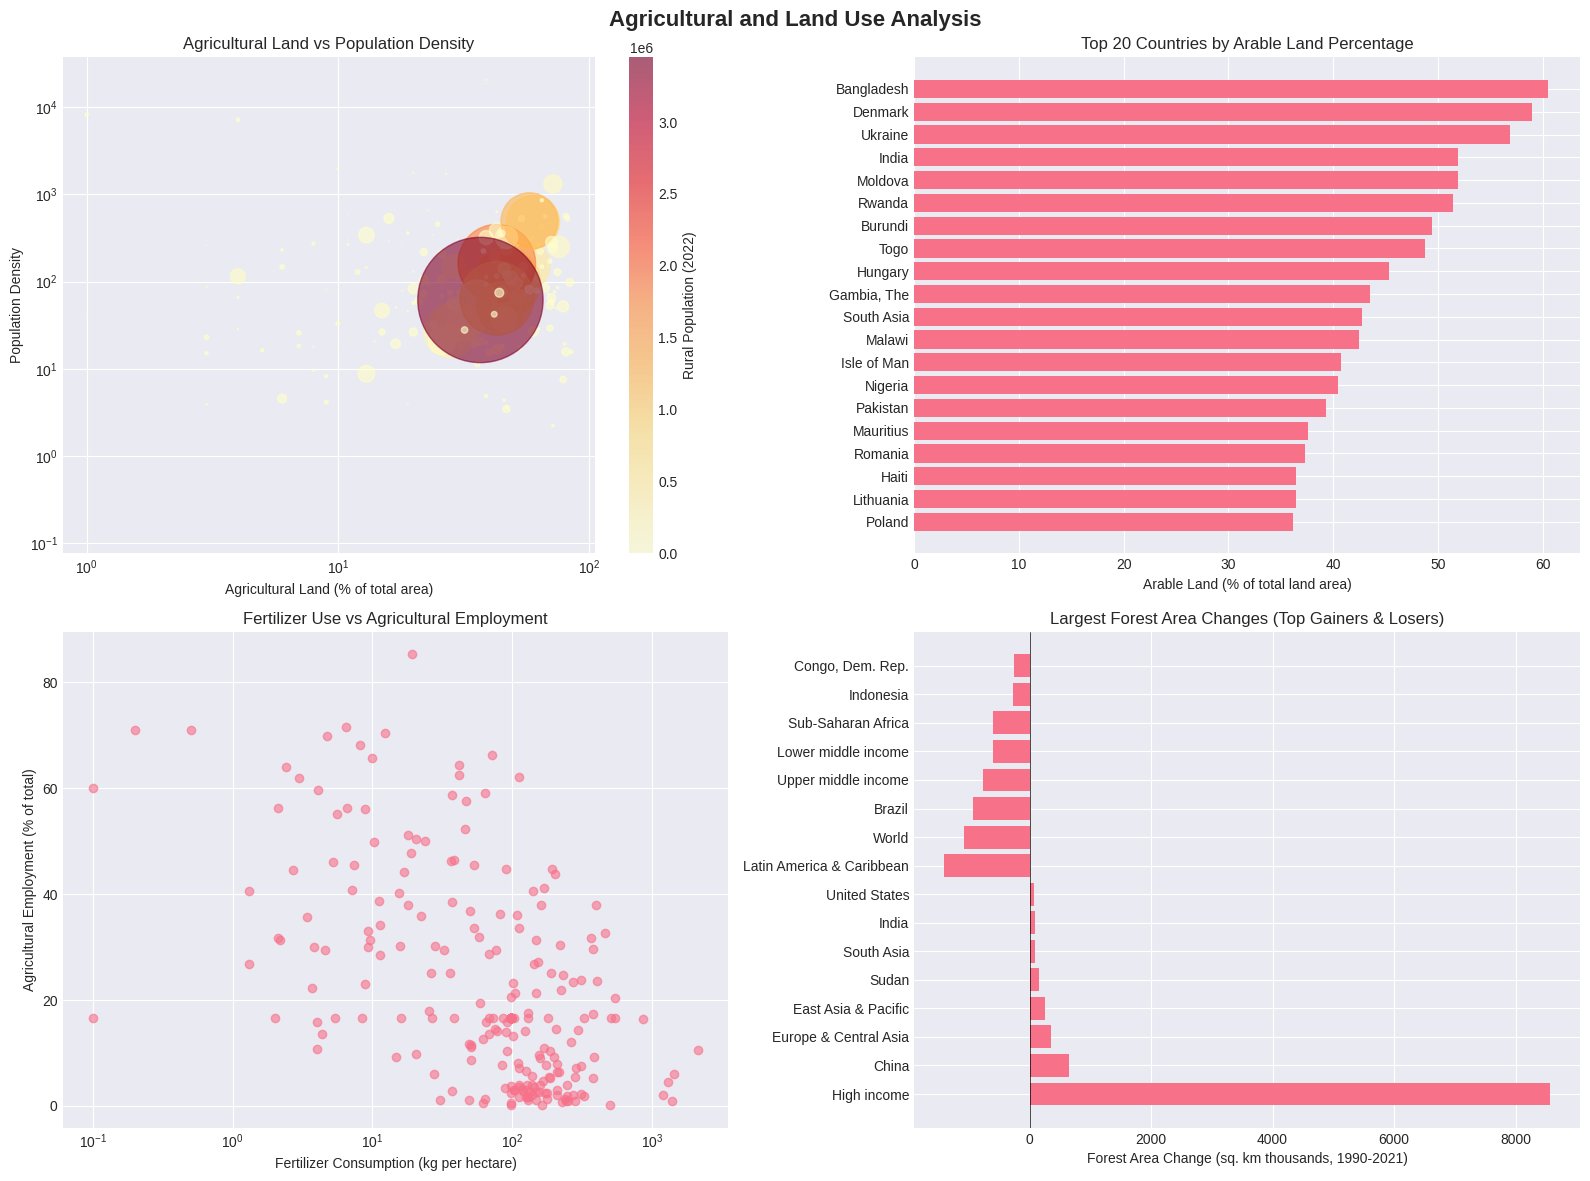

In [17]:
# Create figure for agricultural analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Agricultural and Land Use Analysis', fontsize=16, fontweight='bold')

# 4.1: Agricultural land vs population density
scatter1 = axes[0, 0].scatter(
    df['Agri_Inputs_Agricultural land_% of land area_2021'],
    df['Population density_people per sq. km_2024'],
    c=df['Rural_Env_Rural population_2022'],
    s=df['Population_millions_2024'],
    alpha=0.6,
    cmap='YlOrRd'
)
axes[0, 0].set_xlabel('Agricultural Land (% of total area)')
axes[0, 0].set_ylabel('Population Density')
axes[0, 0].set_title('Agricultural Land vs Population Density')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
plt.colorbar(scatter1, ax=axes[0, 0], label='Rural Population (2022)')

# 4.2: Arable land distribution
top_20_arable = df.nlargest(20, 'Rural_Env_Arable land (% of land area)_2021')
axes[0, 1].barh(top_20_arable['Country'], 
                top_20_arable['Rural_Env_Arable land (% of land area)_2021'])
axes[0, 1].set_xlabel('Arable Land (% of total land area)')
axes[0, 1].set_title('Top 20 Countries by Arable Land Percentage')
axes[0, 1].invert_yaxis()

# 4.3: Fertilizer consumption vs agricultural employment
axes[1, 0].scatter(
    df['Agri_Inputs_Fertilizer consumption_kilograms per hectare of arable land_2021'],
    df['Agri_Inputs_Agricultural employment_% of total employment_2020'],
    alpha=0.6
)
axes[1, 0].set_xlabel('Fertilizer Consumption (kg per hectare)')
axes[1, 0].set_ylabel('Agricultural Employment (% of total)')
axes[1, 0].set_title('Fertilizer Use vs Agricultural Employment')
axes[1, 0].set_xscale('log')

# 4.4: Forest area change (1990-2021)
# Filter countries with both values
forest_df = df.dropna(subset=['Forest_Bio_Forest area_sq. km thousands_1990', 
                              'Forest_Bio_Forest area_sq. km thousands_2021'])
forest_df['Forest_Change'] = forest_df['Forest_Bio_Forest area_sq. km thousands_2021'] - forest_df['Forest_Bio_Forest area_sq. km thousands_1990']
top_forest_change = forest_df.nlargest(15, 'Forest_Change')
bottom_forest_change = forest_df.nsmallest(15, 'Forest_Change')

combined = pd.concat([top_forest_change.head(8), bottom_forest_change.head(8)])
y_pos = np.arange(len(combined))
axes[1, 1].barh(y_pos, combined['Forest_Change'])
axes[1, 1].set_yticks(y_pos)
axes[1, 1].set_yticklabels(combined['Country'])
axes[1, 1].set_xlabel('Forest Area Change (sq. km thousands, 1990-2021)')
axes[1, 1].set_title('Largest Forest Area Changes (Top Gainers & Losers)')
axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig('../../outputs/eda/economic_visualization/agricultural_and_land_use_analysis.png', dpi=300)
plt.show()

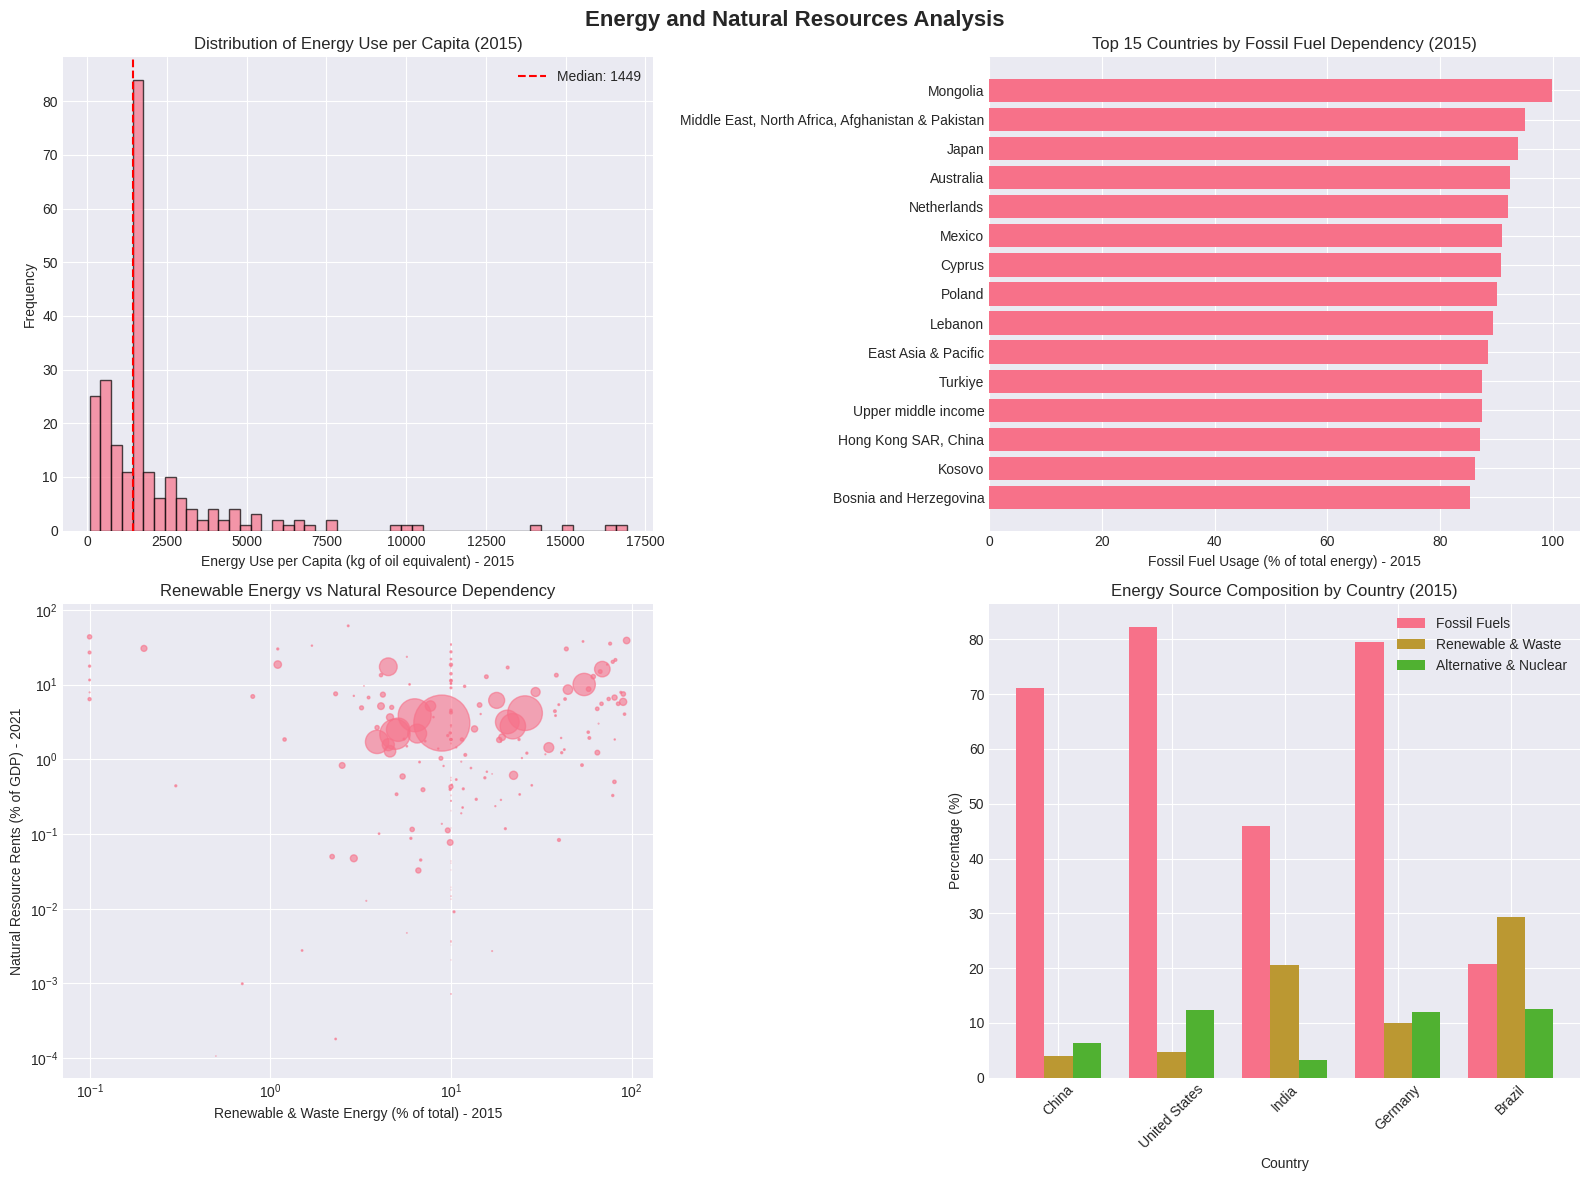

In [18]:
# Create figure for energy analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Energy and Natural Resources Analysis', fontsize=16, fontweight='bold')

# 5.1: Energy use per capita distribution
energy_2015 = df['Energy_Energy use_per capita_kilograms of oil equivalent_2015'].dropna()
axes[0, 0].hist(energy_2015, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Energy Use per Capita (kg of oil equivalent) - 2015')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Energy Use per Capita (2015)')
axes[0, 0].axvline(energy_2015.median(), color='red', linestyle='--', 
                   label=f'Median: {energy_2015.median():.0f}')
axes[0, 0].legend()

# 5.2: Top countries by fossil fuel usage
fossil_fuel_df = df.nlargest(15, 'Energy_Energy use_Fossil fuel_% of total energy use_2015')
axes[0, 1].barh(fossil_fuel_df['Country'], 
                fossil_fuel_df['Energy_Energy use_Fossil fuel_% of total energy use_2015'])
axes[0, 1].set_xlabel('Fossil Fuel Usage (% of total energy) - 2015')
axes[0, 1].set_title('Top 15 Countries by Fossil Fuel Dependency (2015)')
axes[0, 1].invert_yaxis()

# 5.3: Renewable energy vs GDP from natural resources
axes[1, 0].scatter(
    df['Energy_Energy use_Combustible renewable and waste_% of total energy use_2015'],
    df['NatResource_GDP_Total natural resources rents_% of GDP_2021'],
    alpha=0.6,
    s=df['Population_millions_2024']/5
)
axes[1, 0].set_xlabel('Renewable & Waste Energy (% of total) - 2015')
axes[1, 0].set_ylabel('Natural Resource Rents (% of GDP) - 2021')
axes[1, 0].set_title('Renewable Energy vs Natural Resource Dependency')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')

# 5.4: Energy source composition for selected countries
selected_countries = ['China', 'United States', 'India', 'Germany', 'Brazil']
energy_cols = [
    'Energy_Energy use_Fossil fuel_% of total energy use_2015',
    'Energy_Energy use_Combustible renewable and waste_% of total energy use_2015',
    'Energy_Energy use_Alternative and nuclear energy_% of total energy use_2015'
]

energy_data = []
for country in selected_countries:
    country_data = df[df['Country'] == country]
    if not country_data.empty:
        values = country_data[energy_cols].values.flatten()
        energy_data.append(values)

if energy_data:
    energy_data = np.array(energy_data)
    x = np.arange(len(selected_countries))
    width = 0.25
    
    axes[1, 1].bar(x - width, energy_data[:, 0], width, label='Fossil Fuels')
    axes[1, 1].bar(x, energy_data[:, 1], width, label='Renewable & Waste')
    axes[1, 1].bar(x + width, energy_data[:, 2], width, label='Alternative & Nuclear')
    
    axes[1, 1].set_xlabel('Country')
    axes[1, 1].set_ylabel('Percentage (%)')
    axes[1, 1].set_title('Energy Source Composition by Country (2015)')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(selected_countries, rotation=45)
    axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../../outputs/eda/economic_visualization/energy_and_resource_analysis.png', dpi=300)
plt.show()

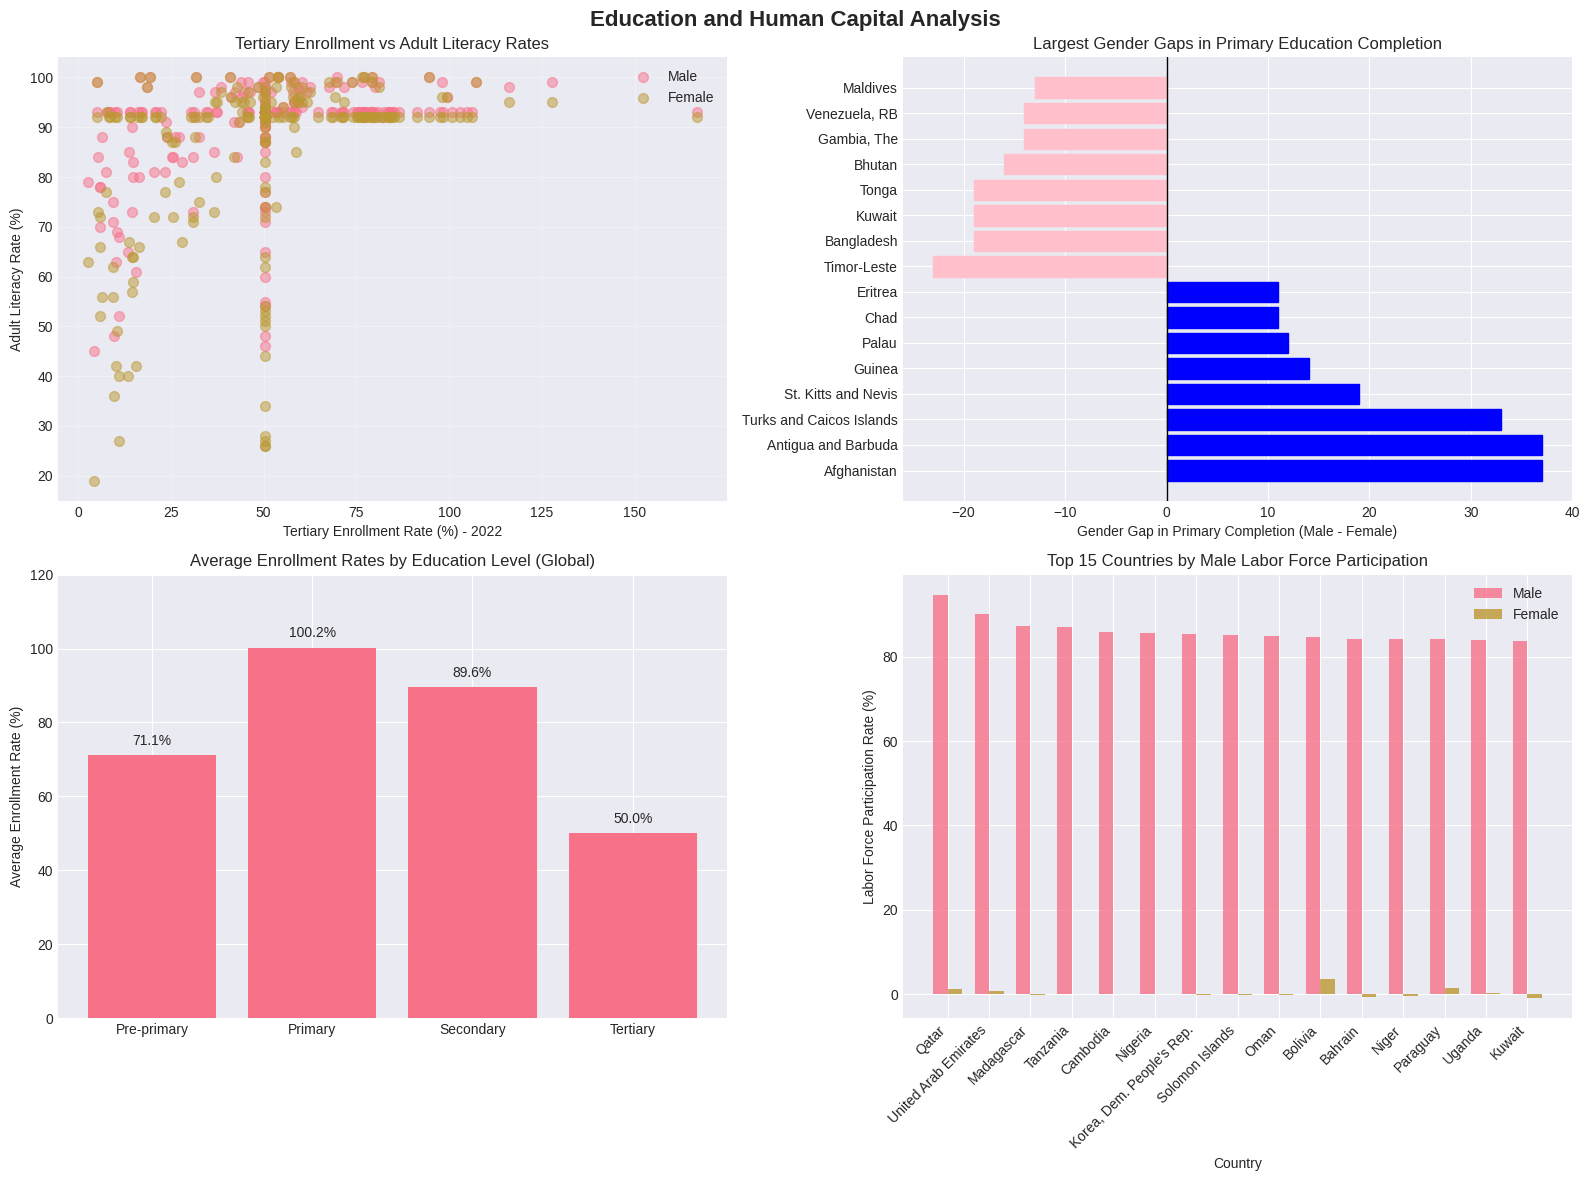

In [19]:
# Create figure for education analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Education and Human Capital Analysis', fontsize=16, fontweight='bold')

# 6.1: Tertiary enrollment vs literacy rates
axes[0, 0].scatter(
    df['Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant age group_2022'],
    df['Edu_Completion_Adult literacy rate_Male_% ages 15 and older_2016-23'],
    alpha=0.5,
    label='Male',
    s=50
)
axes[0, 0].scatter(
    df['Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant age group_2022'],
    df['Edu_Completion_Adult literacy rate_Female_% ages 15 and older_2016-23'],
    alpha=0.5,
    label='Female',
    s=50
)
axes[0, 0].set_xlabel('Tertiary Enrollment Rate (%) - 2022')
axes[0, 0].set_ylabel('Adult Literacy Rate (%)')
axes[0, 0].set_title('Tertiary Enrollment vs Adult Literacy Rates')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 6.2: Gender gap in education completion
# Calculate gender gap in primary completion
df['Primary_Completion_Gap'] = df['Edu_Completion_Primary completion rate_Male_% of relevant age group_2022'] - \
                               df['Edu_Completion_Primary completion rate_Female_% of relevant age group_2022']

gap_df = df.dropna(subset=['Primary_Completion_Gap'])
largest_gaps = gap_df.nlargest(10, 'Primary_Completion_Gap', 'all')
smallest_gaps = gap_df.nsmallest(10, 'Primary_Completion_Gap', 'all')

combined_gaps = pd.concat([largest_gaps.head(8), smallest_gaps.head(8)])
y_pos = np.arange(len(combined_gaps))
bars = axes[0, 1].barh(y_pos, combined_gaps['Primary_Completion_Gap'])
axes[0, 1].set_yticks(y_pos)
axes[0, 1].set_yticklabels(combined_gaps['Country'])
axes[0, 1].set_xlabel('Gender Gap in Primary Completion (Male - Female)')
axes[0, 1].set_title('Largest Gender Gaps in Primary Education Completion')
axes[0, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)

# Color bars based on direction of gap
for i, bar in enumerate(bars):
    if combined_gaps['Primary_Completion_Gap'].iloc[i] > 0:
        bar.set_color('blue')  # Male advantage
    else:
        bar.set_color('pink')  # Female advantage

# 6.3: Education enrollment levels comparison
enrollment_cols = [
    'Edu_Participation_Gross enrollment ratio_Preprimary_% of relevant age group_2022',
    'Edu_Participation_Gross enrollment ratio_Primary_% of relevant age group_2022',
    'Edu_Participation_Gross enrollment ratio_Secondary_% of relevant age group_2022',
    'Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant age group_2022'
]

enrollment_means = df[enrollment_cols].mean()
axes[1, 0].bar(['Pre-primary', 'Primary', 'Secondary', 'Tertiary'], enrollment_means)
axes[1, 0].set_ylabel('Average Enrollment Rate (%)')
axes[1, 0].set_title('Average Enrollment Rates by Education Level (Global)')
axes[1, 0].set_ylim(0, 120)

# Add value labels on bars
for i, v in enumerate(enrollment_means):
    axes[1, 0].text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom')

# 6.4: Labor force participation by gender
# Get countries with complete data
labor_cols = [
    'Labor_Labor force participation rate_Male_% ages 15 and older_2021',
    'Labor_Labor force participation rate_Female_% ages 15 and older_2015-21'
]
labor_df = df.dropna(subset=labor_cols).nlargest(15, 'Labor_Labor force participation rate_Male_% ages 15 and older_2021')

x = np.arange(len(labor_df))
width = 0.35

axes[1, 1].bar(x - width/2, labor_df['Labor_Labor force participation rate_Male_% ages 15 and older_2021'], 
               width, label='Male', alpha=0.8)
axes[1, 1].bar(x + width/2, labor_df['Labor_Labor force participation rate_Female_% ages 15 and older_2015-21'], 
               width, label='Female', alpha=0.8)

axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Labor Force Participation Rate (%)')
axes[1, 1].set_title('Top 15 Countries by Male Labor Force Participation')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(labor_df['Country'], rotation=45, ha='right')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../../outputs/eda/economic_visualization/education_and_human_capital_analysis.png', dpi=300)
plt.show()

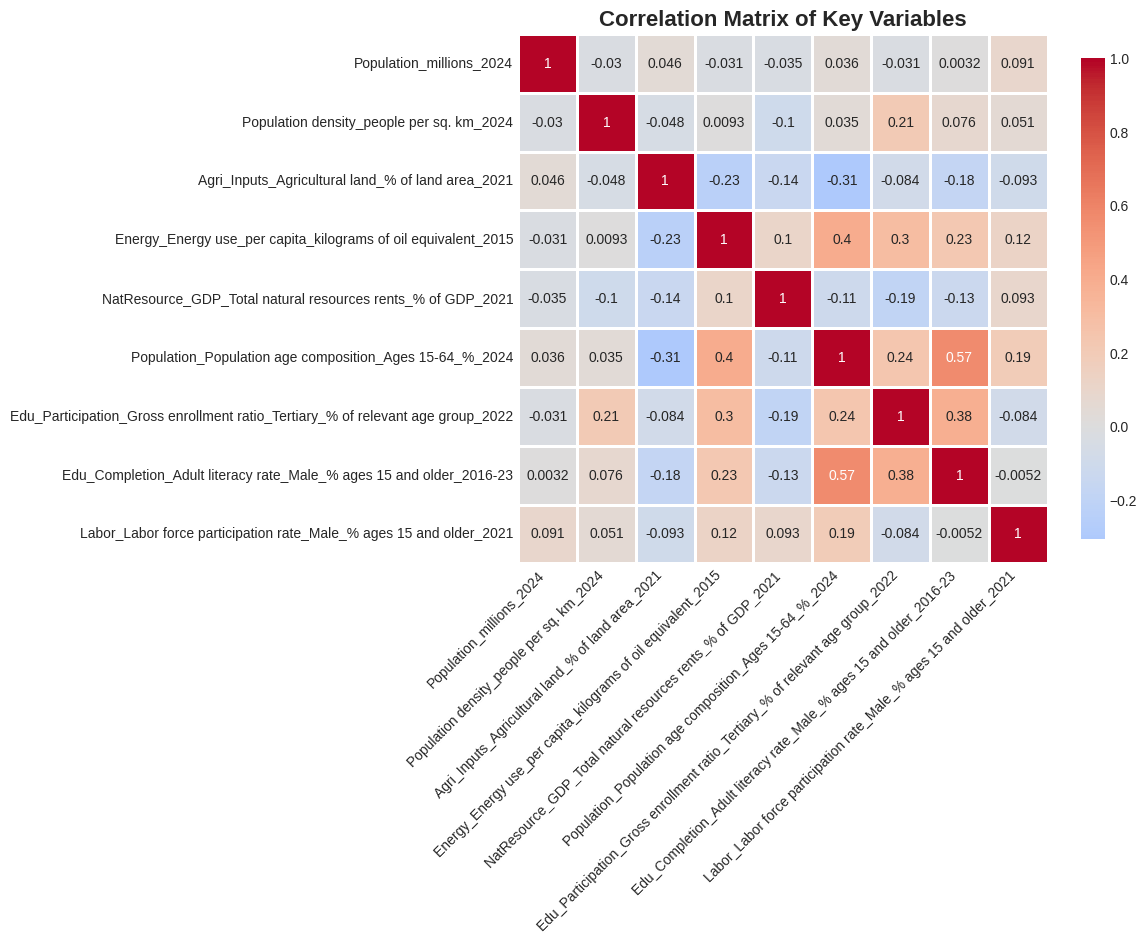

KEY INSIGHTS SUMMARY

1. POPULATION CORRELATIONS:
----------------------------------------

2. EDUCATION CORRELATIONS:
----------------------------------------

3. RESOURCE AND ENERGY CORRELATIONS:
----------------------------------------
   Energy use per capita has a positive correlation (0.40) with Population_Population age composition_Ages 15-64_%_2024

VISUALIZATION COMPLETE - DATASET READY FOR ANALYSIS


In [21]:
# Select key numerical columns for correlation analysis
correlation_cols = [
    'Population_millions_2024',
    'Population density_people per sq. km_2024',
    'Agri_Inputs_Agricultural land_% of land area_2021',
    'Energy_Energy use_per capita_kilograms of oil equivalent_2015',
    'NatResource_GDP_Total natural resources rents_% of GDP_2021',
    'Population_Population age composition_Ages 15-64_%_2024',
    'Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant age group_2022',
    'Edu_Completion_Adult literacy rate_Male_% ages 15 and older_2016-23',
    'Labor_Labor force participation rate_Male_% ages 15 and older_2021'
]

# Create correlation matrix
corr_matrix = df[correlation_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../../outputs/eda/economic_visualization/correlation_heatmap_and_final_insights.png', dpi=300)
plt.show()

# Generate insights summary
print("=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)

# Insight 1: Population correlations
print("\n1. POPULATION CORRELATIONS:")
print("-" * 40)
pop_corrs = corr_matrix['Population_millions_2024'].sort_values(ascending=False)
for idx, val in pop_corrs.items():
    if idx != 'Population_millions_2024' and abs(val) > 0.3:
        direction = "positive" if val > 0 else "negative"
        print(f"   Population size has a {direction} correlation ({val:.2f}) with {idx}")

# Insight 2: Education correlations
print("\n2. EDUCATION CORRELATIONS:")
print("-" * 40)
edu_corrs = corr_matrix['Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant age group_2022'].sort_values(ascending=False)
for idx, val in edu_corrs.items():
    if idx != 'Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant age group_2022' and abs(val) > 0.4:
        direction = "positive" if val > 0 else "negative"
        print(f"   Tertiary enrollment has a {direction} correlation ({val:.2f}) with {idx}")

# Insight 3: Resource correlations
print("\n3. RESOURCE AND ENERGY CORRELATIONS:")
print("-" * 40)
energy_corrs = corr_matrix['Energy_Energy use_per capita_kilograms of oil equivalent_2015'].sort_values(ascending=False)
for idx, val in energy_corrs.items():
    if idx != 'Energy_Energy use_per capita_kilograms of oil equivalent_2015' and abs(val) > 0.4:
        direction = "positive" if val > 0 else "negative"
        print(f"   Energy use per capita has a {direction} correlation ({val:.2f}) with {idx}")

print("\n" + "=" * 80)
print("VISUALIZATION COMPLETE - DATASET READY FOR ANALYSIS")
print("=" * 80)

In [22]:
# Interactive country comparison tool
def compare_countries(country1, country2):
    """Compare two countries across key metrics"""
    
    metrics = {
        'Population (Millions)': 'Population_millions_2024',
        'Population Density': 'Population density_people per sq. km_2024',
        'Agricultural Land (%)': 'Agri_Inputs_Agricultural land_% of land area_2021',
        'Tertiary Enrollment (%)': 'Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant age group_2022',
        'Energy Use per Capita': 'Energy_Energy use_per capita_kilograms of oil equivalent_2015',
        'Working Age Population (%)': 'Population_Population age composition_Ages 15-64_%_2024'
    }
    
    # Get data for both countries
    data1 = df[df['Country'] == country1].iloc[0] if country1 in df['Country'].values else None
    data2 = df[df['Country'] == country2].iloc[0] if country2 in df['Country'].values else None
    
    if data1 is None or data2 is None:
        print("One or both countries not found in dataset.")
        return
    
    # Create comparison table
    comparison = pd.DataFrame({
        'Metric': list(metrics.keys()),
        country1: [data1[metrics[m]] for m in metrics.keys()],
        country2: [data2[metrics[m]] for m in metrics.keys()]
    })
    
    display(comparison)
    
    # Visual comparison
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x = np.arange(len(metrics))
    width = 0.35
    
    ax.bar(x - width/2, comparison[country1], width, label=country1, alpha=0.8)
    ax.bar(x + width/2, comparison[country2], width, label=country2, alpha=0.8)
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title(f'Comparison: {country1} vs {country2}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics.keys(), rotation=45, ha='right')
    ax.legend()
    
    plt.tight_layout()
    plt.show()